In [34]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [35]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [36]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [37]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [38]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)



In [39]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [40]:
# Save references to each table
Measurement = Base.classes.measurement

Station = Base.classes.station

In [41]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [42]:

#Find columns in the data set "measurement"
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [43]:
# Find the most recent date in the data set.

# most_recent_date = session.query(func.max(Measurement.date)).scalar()

most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]

print(f"The most recent date in the dataset is: {most_recent_date}")


The most recent date in the dataset is: 2017-08-23


In [44]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
year_ago = dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - dt.timedelta(days=365)

print(f"Most recent date: {most_recent_date}")
print(f"A year ago is: {year_ago.strftime('%Y-%m-%d')}")


Most recent date: 2017-08-23
A year ago is: 2016-08-23


In [46]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp ).filter(Measurement.date >= year_ago).\
    order_by(Measurement.date).all()
dates = [result[0] for result in results]
precipitation = [result[1] for result in results]

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(results, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by='Date')
precipitation_df.head()

,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


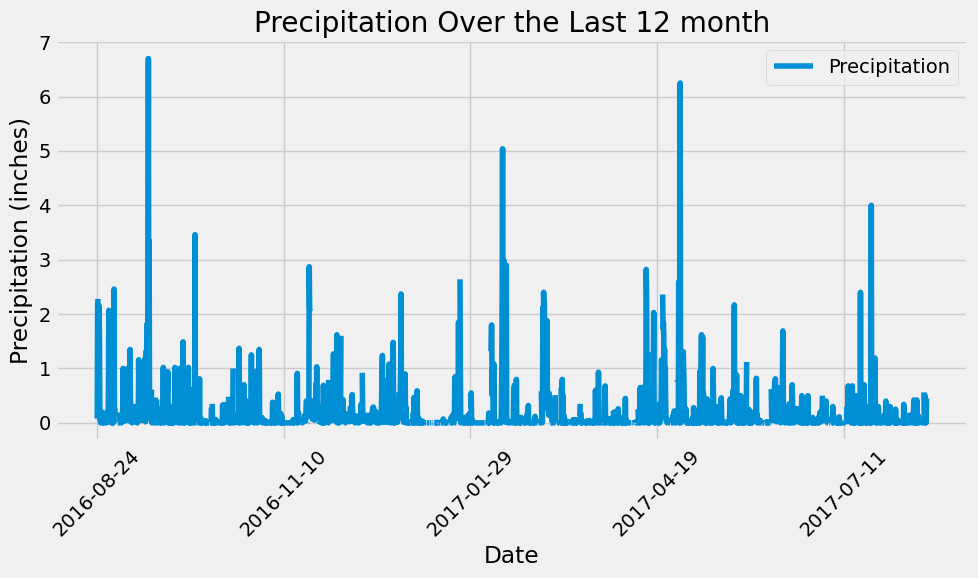

In [47]:
# Use Pandas Plotting with Matplotlib to plot the data

precipitation_df.plot(x='Date', y ='Precipitation', kind='line', figsize=(10, 6))
plt.title("Precipitation Over the Last 12 month")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [48]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = precipitation_df['Precipitation'].describe()
print(f"Summary statistics for precipitation: \n{summary_stats}")


Summary statistics for precipitation: 
count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64


In [49]:
#Find columns in the data set "station"
inspector = inspect(engine)
columns = inspector.get_columns('station')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Station Analysis

In [50]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Station.id).distinct().count()

print(f"Number of stations is: {station_count}")

Number of stations is: 9


In [51]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
#List the stations and their counts in descending order.
most_active_stations = session.query(
    Measurement.station, 
    func.count(Measurement.station).label('count')
).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()


for station, count in most_active_stations:
    print(f"Station: {station}, Observations: {count}")



Station: USC00519281, Observations: 2772
Station: USC00519397, Observations: 2724
Station: USC00513117, Observations: 2709
Station: USC00519523, Observations: 2669
Station: USC00516128, Observations: 2612
Station: USC00514830, Observations: 2202
Station: USC00511918, Observations: 1979
Station: USC00517948, Observations: 1372
Station: USC00518838, Observations: 511


In [53]:
#Most active station
most_active_station = most_active_stations[0][0]
most_active_station

'USC00519281'

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#You’ll need to use functions such as func.min, func.max, and func.avg in your query.
Measurement.tobs

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

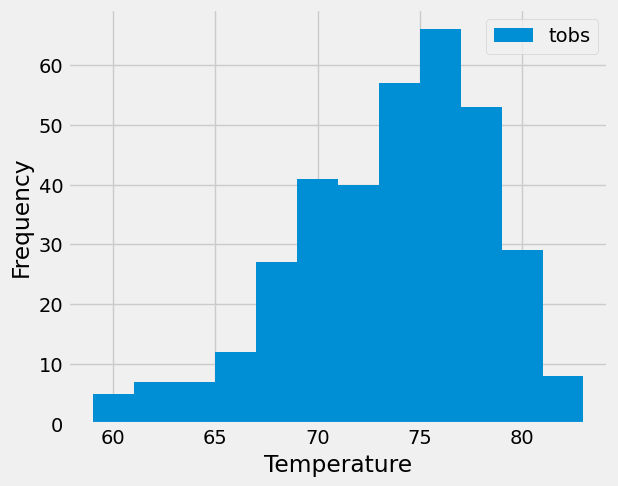

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()